## **Popularity based recommendation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies_df = pd.read_csv('movies.csv')
print(movies_df.shape)
movies_df.head()

(9125, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_df = pd.read_csv('ratings.csv')
print(ratings_df.shape)
ratings_df.head()

(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
df = pd.merge(ratings_df, movies_df, on='movieId')

In [5]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama
...,...,...,...,...,...,...
99999,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi
100000,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller
100001,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance
100002,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Drama|Romance


**Criteria** For Popularity Based Recommendation Systems

The criteria is based on:
1. Movies with the highest rating
2. Number of views

In [6]:
#df.groupby('title')['rating'].mean()

df.groupby(by='title').agg(Rating = ('rating', 'mean'))

,Rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [7]:
ratings_means = df.groupby(by='title').agg(Rating = ('rating', 'mean')).sort_values('Rating', ascending=False)
ratings_means

,Rating
title,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0
Alien Escape (1995),5.0
Boiling Point (1993),5.0
Bone Tomahawk (2015),5.0
Borgman (2013),5.0
...,...
Waterloo Bridge (1940),0.5
Karla (2006),0.5
Ring of Terror (1962),0.5


In [8]:
#df.groupby('title')['rating'].count().sort_values('Rating', ascending=False)
ratings_counts = df.groupby(by='title').agg(Rating = ('rating', 'count')).sort_values('Rating', ascending=False)
ratings_counts

,Rating
title,
Forrest Gump (1994),341
Pulp Fiction (1994),324
"Shawshank Redemption, The (1994)",311
"Silence of the Lambs, The (1991)",304
Star Wars: Episode IV - A New Hope (1977),291
...,...
Robin Williams: Weapons of Self Destruction (2009),1
"Good German, The (2006)",1
"Good Earth, The (1937)",1


In [9]:
ratings_means['Counts'] = ratings_counts
ratings_means

,Rating,Counts
title,,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0,1
Alien Escape (1995),5.0,1
Boiling Point (1993),5.0,1
Bone Tomahawk (2015),5.0,1
Borgman (2013),5.0,1
...,...,...
Waterloo Bridge (1940),0.5,1
Karla (2006),0.5,1
Ring of Terror (1962),0.5,1


In [10]:
ratings_means.sort_values('Counts', ascending=False)

,Rating,Counts
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
...,...,...
Aloha (2015),3.500000,1
All the Right Moves (1983),3.500000,1
Charlie St. Cloud (2010),3.500000,1


In [11]:
ratings_means['Rating'] = round(ratings_means['Rating'], 2)
ratings_means.sort_values('Counts', ascending=False)

,Rating,Counts
title,,
Forrest Gump (1994),4.05,341
Pulp Fiction (1994),4.26,324
"Shawshank Redemption, The (1994)",4.49,311
"Silence of the Lambs, The (1991)",4.14,304
Star Wars: Episode IV - A New Hope (1977),4.22,291
...,...,...
Aloha (2015),3.50,1
All the Right Moves (1983),3.50,1
Charlie St. Cloud (2010),3.50,1


In [12]:
# Top ten movies
selected_movies = ratings_means[(ratings_means['Rating'] > 3) & (ratings_means['Counts'] > 100)].sort_values('Rating', ascending=False).head(10)
selected_movies

,Rating,Counts
title,,
"Godfather, The (1972)",4.49,200
"Shawshank Redemption, The (1994)",4.49,311
"Godfather: Part II, The (1974)",4.39,135
"Usual Suspects, The (1995)",4.37,201
Schindler's List (1993),4.30,244
One Flew Over the Cuckoo's Nest (1975),4.26,144
Fargo (1996),4.26,224
Pulp Fiction (1994),4.26,324
"Dark Knight, The (2008)",4.24,121


## **Content based recommendation**

We want to base on our past movie data to recommend similar movies based on similar plot, genre, director, etc. For example if we search for Titanic movie, similar movies should be recommended to us, which can be done based on the plots, directors, cast, etc.

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
df = pd.read_csv('https://query.data.world/s/uikepcpffyo2nhig52xxeevdialfl7')
print(df.shape)
df.head()

(250, 38)


,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [15]:
df_selected = df[['Title', 'Genre', 'Director', 'Actors', 'Plot']]
df_selected.head()

,Title,Genre,Director,Actors,Plot
0,The Shawshank Redemption,"Crime, Drama",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...
3,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...
4,12 Angry Men,"Crime, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...


In [16]:
# converting to lower case to avoid duplicates and splitting the actors' full names
df_splited = df_selected.copy()
df_splited.loc[:, 'Actors'] = df_splited.loc[:, 'Actors'].map(lambda x: x.replace(' ', '').lower())

In [17]:
df_splited

,Title,Genre,Director,Actors,Plot
0,The Shawshank Redemption,"Crime, Drama",Frank Darabont,"timrobbins,morganfreeman,bobgunton,williamsadler",Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",Francis Ford Coppola,"marlonbrando,alpacino,jamescaan,richards.caste...",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"alpacino,robertduvall,dianekeaton,robertdeniro",The early life and career of Vito Corleone in ...
3,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"christianbale,heathledger,aaroneckhart,michael...",When the menace known as the Joker emerges fro...
4,12 Angry Men,"Crime, Drama",Sidney Lumet,"martinbalsam,johnfiedler,leej.cobb,e.g.marshall",A jury holdout attempts to prevent a miscarria...
...,...,...,...,...,...
245,The Lost Weekend,"Drama, Film-Noir",Billy Wilder,"raymilland,janewyman,phillipterry,howarddasilva",The desperate life of a chronic alcoholic is f...
246,Short Term 12,Drama,Destin Daniel Cretton,"brielarson,johngallagherjr.,stephaniebeatriz,r...",A 20-something supervising staff member of a r...
247,His Girl Friday,"Comedy, Drama, Romance",Howard Hawks,"carygrant,rosalindrussell,ralphbellamy,geneloc...",A newspaper editor uses every trick in the boo...
248,The Straight Story,"Biography, Drama",David Lynch,"sissyspacek,janegallowayheitz,josepha.carpente...",An old man makes a long journey by lawn-mover ...


In [18]:
# converting to lower case to avoid duplicates and splitting the genres
 
df_splited.loc[:, 'Genre'] = df_splited.loc[:, 'Genre'].map(lambda x: x.lower().split(','))
df_splited

,Title,Genre,Director,Actors,Plot
0,The Shawshank Redemption,"[crime, drama]",Frank Darabont,"timrobbins,morganfreeman,bobgunton,williamsadler",Two imprisoned men bond over a number of years...
1,The Godfather,"[crime, drama]",Francis Ford Coppola,"marlonbrando,alpacino,jamescaan,richards.caste...",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"[crime, drama]",Francis Ford Coppola,"alpacino,robertduvall,dianekeaton,robertdeniro",The early life and career of Vito Corleone in ...
3,The Dark Knight,"[action, crime, drama]",Christopher Nolan,"christianbale,heathledger,aaroneckhart,michael...",When the menace known as the Joker emerges fro...
4,12 Angry Men,"[crime, drama]",Sidney Lumet,"martinbalsam,johnfiedler,leej.cobb,e.g.marshall",A jury holdout attempts to prevent a miscarria...
...,...,...,...,...,...
245,The Lost Weekend,"[drama, film-noir]",Billy Wilder,"raymilland,janewyman,phillipterry,howarddasilva",The desperate life of a chronic alcoholic is f...
246,Short Term 12,[drama],Destin Daniel Cretton,"brielarson,johngallagherjr.,stephaniebeatriz,r...",A 20-something supervising staff member of a r...
247,His Girl Friday,"[comedy, drama, romance]",Howard Hawks,"carygrant,rosalindrussell,ralphbellamy,geneloc...",A newspaper editor uses every trick in the boo...
248,The Straight Story,"[biography, drama]",David Lynch,"sissyspacek,janegallowayheitz,josepha.carpente...",An old man makes a long journey by lawn-mover ...


In [19]:
df_splited['Director'] = df_splited['Director'].map(lambda x: x.replace(' ', '').lower())

In [20]:
df_splited

,Title,Genre,Director,Actors,Plot
0,The Shawshank Redemption,"[crime, drama]",frankdarabont,"timrobbins,morganfreeman,bobgunton,williamsadler",Two imprisoned men bond over a number of years...
1,The Godfather,"[crime, drama]",francisfordcoppola,"marlonbrando,alpacino,jamescaan,richards.caste...",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"[crime, drama]",francisfordcoppola,"alpacino,robertduvall,dianekeaton,robertdeniro",The early life and career of Vito Corleone in ...
3,The Dark Knight,"[action, crime, drama]",christophernolan,"christianbale,heathledger,aaroneckhart,michael...",When the menace known as the Joker emerges fro...
4,12 Angry Men,"[crime, drama]",sidneylumet,"martinbalsam,johnfiedler,leej.cobb,e.g.marshall",A jury holdout attempts to prevent a miscarria...
...,...,...,...,...,...
245,The Lost Weekend,"[drama, film-noir]",billywilder,"raymilland,janewyman,phillipterry,howarddasilva",The desperate life of a chronic alcoholic is f...
246,Short Term 12,[drama],destindanielcretton,"brielarson,johngallagherjr.,stephaniebeatriz,r...",A 20-something supervising staff member of a r...
247,His Girl Friday,"[comedy, drama, romance]",howardhawks,"carygrant,rosalindrussell,ralphbellamy,geneloc...",A newspaper editor uses every trick in the boo...
248,The Straight Story,"[biography, drama]",davidlynch,"sissyspacek,janegallowayheitz,josepha.carpente...",An old man makes a long journey by lawn-mover ...


In [21]:
import rake_nltk
import nltk
from rake_nltk import Rake
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ErikC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ErikC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# initializing the new column
df_splited['Key_words'] = ""

for index, row in df_splited.iterrows():
    plot = row['Plot']
    
    # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all punctuation characters
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary with key words and their scores
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column
    row['Key_words'] = list(key_words_dict_scores.keys())

In [23]:
# dropping the Plot column
df_splited.drop(columns = ['Plot'], inplace = True)

In [24]:
df_splited

,Title,Genre,Director,Actors,Key_words
0,The Shawshank Redemption,"[crime, drama]",frankdarabont,"timrobbins,morganfreeman,bobgunton,williamsadler","[two, imprisoned, men, bond, number, years, fi..."
1,The Godfather,"[crime, drama]",francisfordcoppola,"marlonbrando,alpacino,jamescaan,richards.caste...","[aging, patriarch, organized, crime, dynasty, ..."
2,The Godfather: Part II,"[crime, drama]",francisfordcoppola,"alpacino,robertduvall,dianekeaton,robertdeniro","[early, life, career, vito, corleone, 1920s, n..."
3,The Dark Knight,"[action, crime, drama]",christophernolan,"christianbale,heathledger,aaroneckhart,michael...","[menace, known, joker, emerges, mysterious, pa..."
4,12 Angry Men,"[crime, drama]",sidneylumet,"martinbalsam,johnfiedler,leej.cobb,e.g.marshall","[jury, holdout, attempts, prevent, miscarriage..."
...,...,...,...,...,...
245,The Lost Weekend,"[drama, film-noir]",billywilder,"raymilland,janewyman,phillipterry,howarddasilva","[desperate, life, chronic, alcoholic, followed..."
246,Short Term 12,[drama],destindanielcretton,"brielarson,johngallagherjr.,stephaniebeatriz,r...","[20, something, supervising, staff, member, re..."
247,His Girl Friday,"[comedy, drama, romance]",howardhawks,"carygrant,rosalindrussell,ralphbellamy,geneloc...","[newspaper, editor, uses, every, trick, book, ..."
248,The Straight Story,"[biography, drama]",davidlynch,"sissyspacek,janegallowayheitz,josepha.carpente...","[old, man, makes, long, journey, lawn, mover, ..."


In [25]:
df_keywords = df_splited.copy()

In [26]:
df_keywords.set_index('Title', inplace=True)
df_keywords.head()

,Genre,Director,Actors,Key_words
Title,,,,
The Shawshank Redemption,"[crime, drama]",frankdarabont,"timrobbins,morganfreeman,bobgunton,williamsadler","[two, imprisoned, men, bond, number, years, fi..."
The Godfather,"[crime, drama]",francisfordcoppola,"marlonbrando,alpacino,jamescaan,richards.caste...","[aging, patriarch, organized, crime, dynasty, ..."
The Godfather: Part II,"[crime, drama]",francisfordcoppola,"alpacino,robertduvall,dianekeaton,robertdeniro","[early, life, career, vito, corleone, 1920s, n..."
The Dark Knight,"[action, crime, drama]",christophernolan,"christianbale,heathledger,aaroneckhart,michael...","[menace, known, joker, emerges, mysterious, pa..."
12 Angry Men,"[crime, drama]",sidneylumet,"martinbalsam,johnfiedler,leej.cobb,e.g.marshall","[jury, holdout, attempts, prevent, miscarriage..."


In [27]:
df_keywords['Genre'] = df_keywords.loc[:,'Genre'].map(lambda x: ' '.join(x))
df_keywords['Genre']

Title
The Shawshank Redemption              crime  drama
The Godfather                         crime  drama
The Godfather: Part II                crime  drama
The Dark Knight               action  crime  drama
12 Angry Men                          crime  drama
                                     ...          
The Lost Weekend                  drama  film-noir
Short Term 12                                drama
His Girl Friday             comedy  drama  romance
The Straight Story                biography  drama
Slumdog Millionaire                          drama
Name: Genre, Length: 250, dtype: object

In [28]:
df_keywords['Director'] = df_keywords.loc[:,'Director'].map(lambda x: x.replace(',', ' '))
df_keywords['Director']

Title
The Shawshank Redemption                frankdarabont
The Godfather                      francisfordcoppola
The Godfather: Part II             francisfordcoppola
The Dark Knight                      christophernolan
12 Angry Men                              sidneylumet
                                      ...            
The Lost Weekend                          billywilder
Short Term 12                     destindanielcretton
His Girl Friday                           howardhawks
The Straight Story                         davidlynch
Slumdog Millionaire         dannyboyle loveleentandan
Name: Director, Length: 250, dtype: object

In [29]:
df_keywords['Actors'] = df_keywords.loc[:,'Actors'].map(lambda x: x.replace(',', ' '))
df_keywords['Actors']

Title
The Shawshank Redemption     timrobbins morganfreeman bobgunton williamsadler
The Godfather               marlonbrando alpacino jamescaan richards.caste...
The Godfather: Part II         alpacino robertduvall dianekeaton robertdeniro
The Dark Knight             christianbale heathledger aaroneckhart michael...
12 Angry Men                  martinbalsam johnfiedler leej.cobb e.g.marshall
                                                  ...                        
The Lost Weekend              raymilland janewyman phillipterry howarddasilva
Short Term 12               brielarson johngallagherjr. stephaniebeatriz r...
His Girl Friday             carygrant rosalindrussell ralphbellamy geneloc...
The Straight Story          sissyspacek janegallowayheitz josepha.carpente...
Slumdog Millionaire               devpatel saurabhshukla anilkapoor rajzutshi
Name: Actors, Length: 250, dtype: object

In [30]:
df_keywords['Key_words'] = df_keywords.loc[:,'Key_words'].map(lambda x: ' '.join(x))
df_keywords['Key_words']

Title
The Shawshank Redemption    two imprisoned men bond number years finding s...
The Godfather               aging patriarch organized crime dynasty transf...
The Godfather: Part II      early life career vito corleone 1920s new york...
The Dark Knight             menace known joker emerges mysterious past wre...
12 Angry Men                jury holdout attempts prevent miscarriage just...
                                                  ...                        
The Lost Weekend            desperate life chronic alcoholic followed four...
Short Term 12               20 something supervising staff member resident...
His Girl Friday             newspaper editor uses every trick book keep ac...
The Straight Story          old man makes long journey lawn mover tractor ...
Slumdog Millionaire         mumbai teen reflects upbringing slums accused ...
Name: Key_words, Length: 250, dtype: object

In [31]:
df_keywords.head()

,Genre,Director,Actors,Key_words
Title,,,,
The Shawshank Redemption,crime drama,frankdarabont,timrobbins morganfreeman bobgunton williamsadler,two imprisoned men bond number years finding s...
The Godfather,crime drama,francisfordcoppola,marlonbrando alpacino jamescaan richards.caste...,aging patriarch organized crime dynasty transf...
The Godfather: Part II,crime drama,francisfordcoppola,alpacino robertduvall dianekeaton robertdeniro,early life career vito corleone 1920s new york...
The Dark Knight,action crime drama,christophernolan,christianbale heathledger aaroneckhart michael...,menace known joker emerges mysterious past wre...
12 Angry Men,crime drama,sidneylumet,martinbalsam johnfiedler leej.cobb e.g.marshall,jury holdout attempts prevent miscarriage just...


In [32]:
df_keywords['bag_of_words'] = ''
columns = df_keywords.columns
for index, row in df_keywords.iterrows():
    words = ''
    for col in columns:
        words += row[col] + ' '
    row['bag_of_words'] = words 

In [33]:
df_keywords['bag_of_words']

Title
The Shawshank Redemption    crime  drama frankdarabont timrobbins morganfr...
The Godfather               crime  drama francisfordcoppola marlonbrando a...
The Godfather: Part II      crime  drama francisfordcoppola alpacino rober...
The Dark Knight             action  crime  drama christophernolan christia...
12 Angry Men                crime  drama sidneylumet martinbalsam johnfied...
                                                  ...                        
The Lost Weekend            drama  film-noir billywilder raymilland janewy...
Short Term 12               drama destindanielcretton brielarson johngalla...
His Girl Friday             comedy  drama  romance howardhawks carygrant r...
The Straight Story          biography  drama davidlynch sissyspacek janega...
Slumdog Millionaire         drama dannyboyle loveleentandan devpatel saura...
Name: bag_of_words, Length: 250, dtype: object

In [34]:
df_keywords.drop(columns = [col for col in df_keywords.columns if col!= 'bag_of_words'], inplace = True)

In [35]:
df_keywords

,bag_of_words
Title,
The Shawshank Redemption,crime drama frankdarabont timrobbins morganfr...
The Godfather,crime drama francisfordcoppola marlonbrando a...
The Godfather: Part II,crime drama francisfordcoppola alpacino rober...
The Dark Knight,action crime drama christophernolan christia...
12 Angry Men,crime drama sidneylumet martinbalsam johnfied...
...,...
The Lost Weekend,drama film-noir billywilder raymilland janewy...
Short Term 12,drama destindanielcretton brielarson johngalla...
His Girl Friday,comedy drama romance howardhawks carygrant r...


In [36]:
# generating the count matrix

count = CountVectorizer()
count_matrix = count.fit_transform(df_keywords['bag_of_words'])

In [37]:
count_matrix

<250x3176 sparse matrix of type '<class 'numpy.int64'>'
	with 5601 stored elements in Compressed Sparse Row format>

In [38]:
c = count_matrix.todense()

In [39]:
# generating the cosine similarity matrix

cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.14638501, 0.1315587 , ..., 0.05      , 0.05      ,
        0.05270463],
       [0.14638501, 1.        , 0.34236839, ..., 0.048795  , 0.048795  ,
        0.05143445],
       [0.1315587 , 0.34236839, 1.        , ..., 0.0438529 , 0.0438529 ,
        0.04622502],
       ...,
       [0.05      , 0.048795  , 0.0438529 , ..., 1.        , 0.05      ,
        0.05270463],
       [0.05      , 0.048795  , 0.0438529 , ..., 0.05      , 1.        ,
        0.05270463],
       [0.05270463, 0.05143445, 0.04622502, ..., 0.05270463, 0.05270463,
        1.        ]])

In [40]:
# we have a row (array) for each movie compared to the other movies

len(cosine_sim[0])

250

In [41]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list which will be used later to match the indexes

indices = pd.Series(df_keywords.index)
indices

0      The Shawshank Redemption
1                 The Godfather
2        The Godfather: Part II
3               The Dark Knight
4                  12 Angry Men
                 ...           
245            The Lost Weekend
246               Short Term 12
247             His Girl Friday
248          The Straight Story
249         Slumdog Millionaire
Name: Title, Length: 250, dtype: object

In [42]:
# function that takes in movie title as input and returns the top 10 recommended movies

def recommendations(title, cosine_sim=cosine_sim):

    recommended_movies = []

    # getting the index of the movie that matches the title
    indexes = indices[indices==title].index[0]
    
    # creating a Series with the similarity scores in descending order
    scored_series = pd.Series(cosine_sim[indexes]).sort_values(ascending=False)
   
    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(scored_series.iloc[1:11].index)
    print(top_10_indexes)

    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df_keywords.index)[i])

    return recommended_movies

In [43]:
recommendations('Casino')

[15, 54, 226, 94, 1, 188, 7, 2, 50, 83]


['Goodfellas',
 'Once Upon a Time in America',
 'Rope',
 'Raging Bull',
 'The Godfather',
 'Anatomy of a Murder',
 'Pulp Fiction',
 'The Godfather: Part II',
 'Witness for the Prosecution',
 'Scarface']

## **Colaborative Filtering Systems**

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

This bank marketing dataset is open-sourced and available for download at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).

It was originally created by: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [45]:
data = pd.read_csv('bank_full_w_dummy_vars.csv')
print(data.shape)
data.head()

(45211, 37)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single,divorced
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,0,0,0,0,1,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           45211 non-null  int64 
 1   job                           45211 non-null  object
 2   marital                       45211 non-null  object
 3   education                     45211 non-null  object
 4   default                       45211 non-null  object
 5   balance                       45211 non-null  int64 
 6   housing                       45211 non-null  object
 7   loan                          45211 non-null  object
 8   contact                       45211 non-null  object
 9   day                           45211 non-null  int64 
 10  month                         45211 non-null  object
 11  duration                      45211 non-null  int64 
 12  campaign                      45211 non-null  int64 
 13  pdays           

### Ideally, we are supposed to treat all the categorical features differently and use get_dummies to create individual columns for each category. Here we will be focusing on our collaborative filtering instead worrying about data preprocessing.

In [47]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

bank_data = data.apply(le.fit_transform)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single,divorced
0,40,4,1,2,0,3036,1,0,2,4,...,0,0,0,0,0,0,0,1,0,0
1,26,9,2,1,0,945,1,0,2,4,...,0,0,0,0,0,0,0,0,1,1
2,15,2,1,1,0,918,1,1,2,4,...,0,0,0,0,0,0,0,1,0,0
3,29,1,1,3,0,2420,1,0,2,4,...,0,0,0,0,0,0,0,1,0,0
4,15,11,2,3,0,917,0,0,2,4,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,...,0,0,0,0,0,0,0,1,0,0
45207,53,5,0,0,0,2639,0,0,0,16,...,0,1,0,0,0,0,0,0,0,0
45208,54,5,1,1,0,5455,0,0,0,16,...,0,1,0,0,0,0,0,1,0,0
45209,39,1,1,1,0,1584,0,0,1,16,...,0,0,0,0,0,0,0,1,0,0


In [48]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_binary                    ',
       'housing_loan                ', 'credit_in_default', 'personal_loans',
       'prev_failed_to_subscribe    ', 'prev_subscribed             ',
       'job_management              ', 'job_tech                    ',
       'job_entrepreneur            ', 'job_bluecollar              ',
       'job_unknown                 ', 'job_retired                 ',
       'job_services                ', 'job_self_employed           ',
       'job_unemployed              ', 'job_maid                    ',
       'job_student                 ', 'married                     ',
       'single                      ', 'divorced                    '],
      dtype='object')

In [49]:
X = bank_data.loc[:, 'housing_loan                ': 'divorced                    '].values
y = bank_data['y_binary                    ']

In [50]:
LogReg = LogisticRegression()
LogReg.fit(X, y)

LogisticRegression()

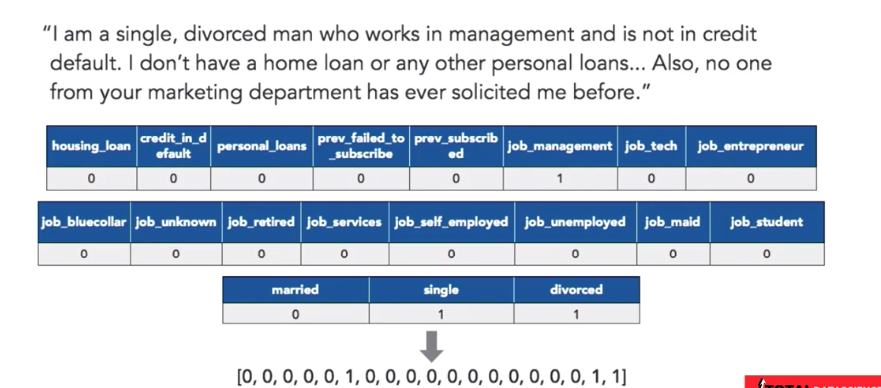

So we need to predict if this person is a potential customer

In [51]:
new_user = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]).reshape(1, -1)

In [52]:
y_pred = LogReg.predict(new_user)
y_pred

array([0], dtype=int64)

The result is '0' so we will  not recommend this user for the new offer since he is not even likely to accept the offer based on our recommendation engine.

## Evaluation of recommender systems

You can use both Classification and Regression metrics for evaluating recommendation engines.
1. RMSE
2. MAE
3. Accuracy
4. ROC/AUC 
5. Precision
6. Recall

In [53]:
y_pred = LogReg.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
# The model here is very good to predict the 'zeros' but very bad in the prediction of the 'ones'
# this is probably happening because of the data imbalance
# we have almost 40000 'zeros' in the data and only 5289 'ones'

from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.67      0.17      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.79      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211

